   Sample X  Sample Y
0         1      1.50
1         2      2.25
2         3      4.00
3         4      3.65
4         5      5.00
5         6      7.10
6         7      7.30
7         8      8.90
8         9      9.50
9        10     11.00


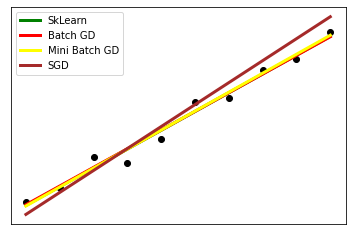

In [14]:
#Batch Gradient Descent
import numpy as np
import pandas as pd
import random
from sklearn import linear_model

data = pd.read_csv('D:/Chrome Downloads/Book1.csv', ',',
                   usecols=['Sample X', 'Sample Y', ])
print(data)

matrix = np.array(data.values,'float')
x = matrix[:,0]
y = matrix[:,1]

x=x.flatten()
y=y.flatten()

N = x.shape[0] # number of samples
alpha = 0.01 #learning rate random
m=random.uniform(0,5) #slope of random line chosen by us (0-5)
c=random.uniform(0,5) #y-intercept of that line



#print (alpha)
#print (m)
#print (c)
 

for j in range (1,1000):
    sum_11 =0
    for i in range (0,N):
        sum_11= sum_11 + x[i]*(m*x[i]+c -y[i])
    
    sum_21 =0
    for k in range (0,N):
        sum_21= sum_21 + (m*x[k]+c -y[k] )
    
    d_m1= 2* sum_11/N #gradient w.r.t m
    d_c1= 2* sum_21/N #gradient w.r.t c

    m =m- alpha* d_m1 #new slope

    c =c- alpha* d_c1 #new y-intercept

#print (m)
#print (c)
matrix_1 = np.array(data.values,'float')
for i in range (0,N):
    matrix_1[i,1]= m*x[i] + c

y_pred1 =matrix_1[:,1]


# Minibatch Gradient
m2=random.uniform(0,5) #slope of random line chosen by us (0-5)
c2=random.uniform(0,5) #y-intercept of that line

n=5 #let number of batches is 5
B= 2 #for this case, let's take all mini-batches each of size 2
#Let's consider the mini batches are choosen in a particular order(for sake of simplicity)
for j in range (1,1000):
    for k in range (0,n):
        sum_12=0
        sum_22=0
        for i in range (0,B):
            sum_12= sum_12 + x[k*B+i]*(m2*x[k*B+i]+c2 -y[k*B+i])


        d_m2= 2* sum_12/B #gradient w.r.t m

        m2 =m2- alpha* d_m2 #new slope


        for z in range (0,B):
            sum_22= sum_22 + (m2*x[k*B+z]+c2 -y[k*B+z] )

        d_c2= 2* sum_22/B #gradient w.r.t c

        c2 =c2- alpha* d_c2 #new y-intercept

#print (m)
#print (c)
matrix_2 = np.array(data.values,'float')

for i in range (0,N):
    matrix_2[i,1]= m2*x[i] + c2

y_pred2 =matrix_2[:,1]

#SGD

m3=random.uniform(0,5) #slope of random line chosen by us (0-5)
c3=random.uniform(0,5) #y-intercept of that line

n1=N #number of batches is total number of data points
B1= 1 #for this case,all mini-batches each of size 1
#Let's consider the mini batches are choosen in a particular order(for sake of simplicity)

for j in range (1,1000):
    for k in range (0,n1):
        sum_13=0
        sum_23=0
        for i in range (0,B1):
            sum_13= sum_13 + x[k*B1+i]*(m3*x[k*B1+i]+c3 -y[k*B1+i])


        d_m3= 2* sum_13/B1 #gradient w.r.t m

        m3 =m3- alpha* d_m3 #new slope


        for z in range (0,B1):
            sum_23= sum_23 + (m3*x[k*B1+z]+c3 -y[k*B1+z] )

        d_c3= 2* sum_23/B1 #gradient w.r.t c

        c3 =c3- alpha* d_c3 #new y-intercept

#print (m)
#print (c)
matrix_3 = np.array(data.values,'float')

for i in range (0,N):
    matrix_3[i,1]= m3*x[i] + c3

y_pred3 =matrix_3[:,1]


#Using Sklearn
regr = linear_model.LinearRegression()
x=x.reshape(-1,1)
regr.fit(x, y)
y_pred = regr.predict(x)

import matplotlib.pyplot as plt
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='green', linewidth=3)
plt.plot(x, y_pred1, color='red', linewidth=3)
plt.plot(x, y_pred2, color='yellow', linewidth=3)
plt.plot(x, y_pred3, color='brown', linewidth=3)

plt.legend(labels=['SkLearn', 'Batch GD', 'Mini Batch GD', 'SGD'])

plt.xticks(())
plt.yticks(())

plt.show()